In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import re


In [2]:
# 模型路径
model_path = "MobileNetV2_0212_09轉_standard.h5"
# 加载模型
model = load_model(model_path)

# 标签文件路径
labels_path = "labels.txt"

# 图片文件夹路径
images_path = "test_photo"
# 图片尺寸（假设你的模型需要固定尺寸的图片）
img_height, img_width = 224, 224

In [3]:

# 加载并预处理图片
images = []
for img_file in os.listdir(images_path):
    img_path = os.path.join(images_path, img_file)
    # 检查扩展名，确保只处理图像文件
    if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # 对于单个图片进行扩展维度
            images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_file}: {e}")
if not images:
    print("No images found in the directory.")
    exit()

images = np.vstack(images) / 255.0  # 将所有图片堆叠成一个大数组并归一化

# 定义类别索引映射
class_indices = {
    "FOAM": 0,
    "上山": 1,
    "卵肌": 2,
    "極潤綠": 3,
    "極潤藍": 4,
    "豆乳": 5,
    "草本青": 6,
    "SIMPLE綠": 7,
    "超微米": 8,
    "雪肌粹": 9,
    "Biore溫和藍": 10,
    "Biore透白靛": 11,
    "bifesta藍": 12,
    "Biore極淨紫": 13,
    "草本綠": 14,
    "bifesta慕斯藍": 15,
    "bifesta慕斯青": 16,
    "bifesta慕斯粉": 17,
}

# 配置 matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 请根据实际可用的字体进行替换
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示为方块的问题

# 假设模型输出是每个样本的类别概率
predicted_probs = model.predict(images)
predicted_labels = np.argmax(predicted_probs, axis=1)  # 获取概率最高的类别索引

6/6 [==============================] - 1s 113ms/step


In [4]:
# 从文件名提取类别名称
def extract_category(filename):
    category = re.sub(r"\d", "", filename.split(".")[0])  # 移除数字
    return category.strip()  # 移除额外的空白字符


# 读取标签文件，并从中提取类别名称
with open(labels_path, "r", encoding="utf-8") as f:
    true_labels = [extract_category(line.strip()) for line in f.readlines()]

# 转换true_labels为整数索引以匹配predicted_labels
true_labels_indices = [class_indices[label] for label in true_labels]

# 确保这行代码能够正确生成包含所有类别名称的列表
target_names = [
    name for name, index in sorted(class_indices.items(), key=lambda item: item[1])
]

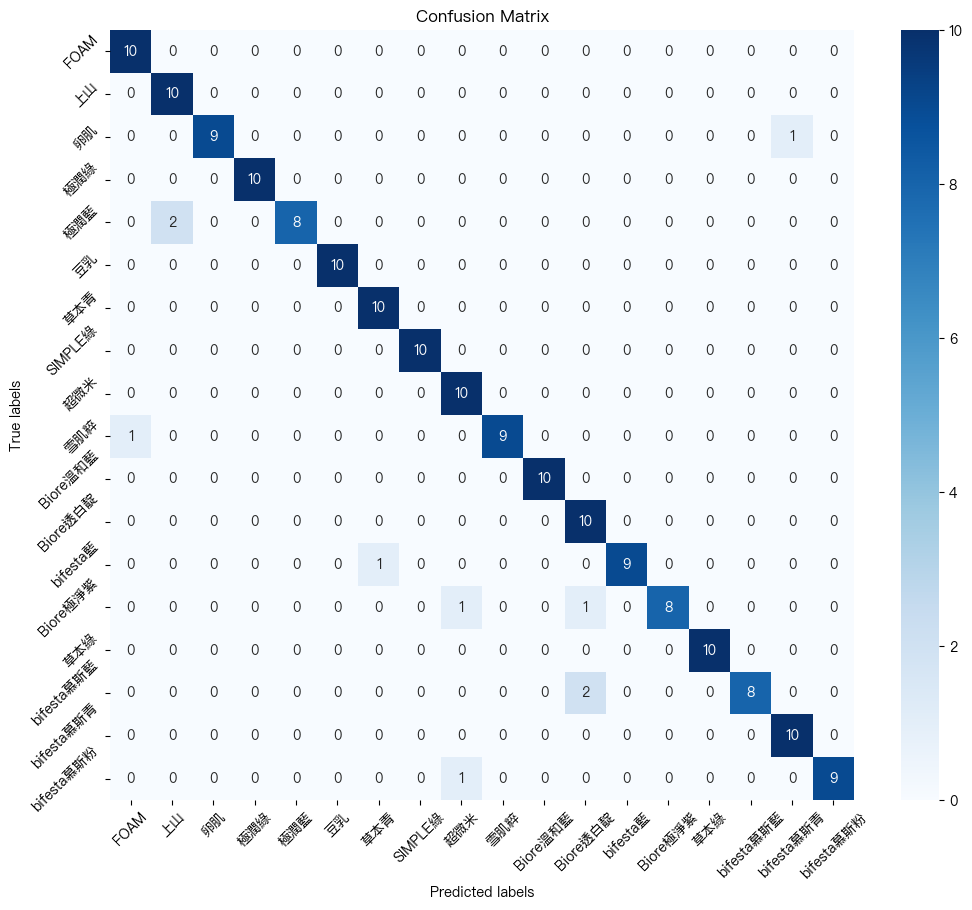

In [5]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(true_labels_indices, predicted_labels)

# 可视化混淆矩阵
plt.figure(figsize=(12, 10))  # 调整图表尺寸
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=target_names,
    yticklabels=target_names,
)
plt.xticks(rotation=45)  # 旋转X轴标签
plt.yticks(rotation=45)  # 旋转Y轴标签
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [6]:
# 打印分类报告
print(
    classification_report(
        true_labels_indices, predicted_labels, target_names=target_names
    )
)

              precision    recall  f1-score   support

        FOAM       0.91      1.00      0.95        10
          上山       0.83      1.00      0.91        10
          卵肌       1.00      0.90      0.95        10
         極潤綠       1.00      1.00      1.00        10
         極潤藍       1.00      0.80      0.89        10
          豆乳       1.00      1.00      1.00        10
         草本青       0.91      1.00      0.95        10
     SIMPLE綠       1.00      1.00      1.00        10
         超微米       0.83      1.00      0.91        10
         雪肌粹       1.00      0.90      0.95        10
    Biore溫和藍       1.00      1.00      1.00        10
    Biore透白靛       0.77      1.00      0.87        10
    bifesta藍       1.00      0.90      0.95        10
    Biore極淨紫       1.00      0.80      0.89        10
         草本綠       1.00      1.00      1.00        10
  bifesta慕斯藍       1.00      0.80      0.89        10
  bifesta慕斯青       0.91      1.00      0.95        10
  bifesta慕斯粉       1.00    